In [128]:
import numpy as np
import pandas as pd

In [129]:
df = pd.read_csv('spam.csv')
df['Category'] = df['Category'].map({'ham' : 0, 'spam' : 1})
df.head(5)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int64 
 1   Message   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [131]:
# Checking for null values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [132]:
#Checking for duplicate values
df.duplicated().sum()

415

In [133]:
# Removing duplicates
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

In [134]:
#EDA
df['Category'].value_counts()


Category
0    4516
1     641
Name: count, dtype: int64

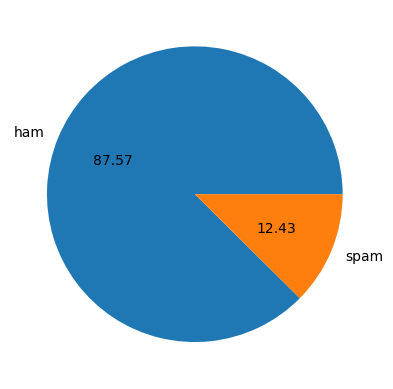

In [135]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts() , labels = ['ham' , 'spam'] , autopct = "%0.2f")
plt.show()

In [136]:
!pip install nltk

In [137]:
import nltk
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DAKSH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [138]:
df['Message'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: Message, Length: 5157, dtype: int64

In [139]:
df['num_characters'] = df['Message'].apply(len)
df.head(5)

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [140]:
# Breaking sentence into list of words or tokenize
df['num_words'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [141]:
df['num_sentences'] = df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [142]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DAKSH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [143]:
from nltk.corpus import stopwords
import string


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
            
    text = y[:]
    y.clear()
    
    for i in text:
        
        #To remove stopwords like who , he , him
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
        
    text = y[:]
    y.clear()
    
    for i in text:
        
        # Ex - play, playing,playful will convert into play because it has similar meaning
        y.append(ps.stem(i))
            
            
       
            
            
    return " ".join(y)

In [144]:
transform_text("Hi shyam. How is your football training going on ?")

'hi shyam footbal train go'

In [145]:
df['transformed_text']= df['Message'].apply(transform_text)

In [146]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [147]:
!pip install wordcloud

In [148]:
from wordcloud import WordCloud
wc = WordCloud(width = 50, height = 500 , min_font_size = 10 , background_color = 'white')
wc.generate(df[df['Category'] == 1]['transformed_text'].str.cat(sep = " "))

In [149]:
spam_corpus = []

for msg in df[df['Category'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [151]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,311
1,free,186
2,2,154
3,txt,139
4,text,122
5,ur,119
6,u,115
7,mobil,110
8,stop,108
9,repli,103


In [152]:
# To convert words to vector

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [153]:
x = cv.fit_transform(df['transformed_text']).toarray()

In [154]:
y = df['Category'].values

In [155]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 2)

In [158]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
bnb = BernoulliNB()

In [160]:
bnb.fit(x_train,y_train)
y_pred = bnb.predict(x_test)
accuracy_score(y_test , y_pred)

0.9718992248062015

ValueError: Expected 2D array, got scalar array instead:
array=Free offer.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.